In [1]:
import pandas as pd

In [2]:
file_path = "./python-data-analysis/data/chipotle.tsv"

chipo = pd.read_csv(file_path, sep = '\t')

print(chipo.shape)
print("--------------------------------")
print(chipo.info())

(4622, 5)
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
print(chipo.columns)
print("--------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
--------------------
RangeIndex(start=0, stop=4622, step=1)


## chipo의 columns 정보
* order_id : 주문번호
* quantity : 아이템의 주문 수량
* item_name : 주문한 아이템의 이름
* choice_description : 주문한 아이템의 상세 선택 옵션(토핑)
* item_price : 주문 아이템의 가격 정보

## quantity와 item_price의 수치적 특징
우선 quantity와 item_price의 수치적 특징을 살펴보겠습니다. 이 두 피처는 __연속형 피처__ 입니다. 연속형 피처는 키와 몸무게처럼 어떠한 값도 가질 수 있는 연속적인 숫자 형태를 의미합니다.

In [5]:
# ordier_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환.
chipo['order_id'] = chipo['order_id'].astype(str)

### describe()는 데이터 프레임에서 피처들의 기초 통계량을 확인

In [6]:
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [7]:
len(chipo['order_id'].unique()) # order number가 1834번 까지 있다.

1834

In [8]:
len(chipo['item_name'].unique()) # 메뉴의 수는 50가지

50

### 가장 많이 주문한 아이템 Top 10 출력

In [9]:
item_count =  chipo['item_name'].value_counts()[:10]

for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [10]:
# 아이템당 주문 개수를 출력합니다.
# 아이템을 Groupby하겠다.
# 각 아이템별로 주문번호를 카운트 했다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [50]:
chipo.groupby('item_name')['order_id'].count().sort_values(ascending = False)

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [12]:
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

### 시각화

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
# item_quantity.values, item_quantity.index로 확인해보면 안다
# tolist는 보기 편하게 list 타입으로 바꿨을 뿐이다.

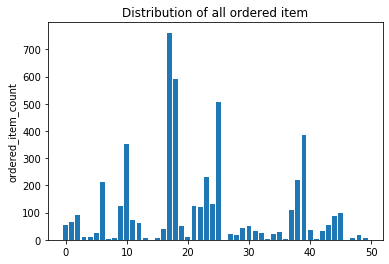

In [14]:
x_pos = np.arange(len(item_name_list)) # 메뉴를 번호로 나타냈다
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

# <Step3. 데이터 전처리>

In [15]:
print(chipo.info())
print('-----------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null object
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-----------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

* 가격에 \\$가 붙었기 때문에 계산을 위해 지워준다

In [16]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [17]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [18]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


# <Step4. 탐색적 분석>: 스무고개로 분석하는 개념적 탐색
*데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기*
* 주문당 평균 계산금액 출력하기
* 한 주문에 10달러 이상 사용한 주문의 id를 출력하기
* 각 아이템의 가격 구하기
* 가장 비싼 주문에서 item이 몇 개 팔렸는지 구하기
* "Veggie Salad Bowl"이 몇 번 주문되었는지 구하기
* "Chicken Bowl"을 2개 이상 주문한 주문 횟수 구하기

__[주문당 평균 계산금액을 출력합니다]__

In [19]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

__[한 주문에 10달러 이상 사용한 id를 출력합니다]__

In [21]:
# 그 전에 order_id가 str타입이라서 정렬시 1, 10, 100처럼 str기준의 정렬이 나온다.
# 다시 숫자형으로 바꿔준다
# ordier_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환.
chipo['order_id'] = chipo['order_id'].astype(int)

In [22]:
# order_id로 묶은 다음 그것을 전부 합친다.
chipo_orderid_group = chipo.groupby('order_id').sum()

In [23]:
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

In [24]:
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
6                2       17.50
7                2       15.70
8                2       10.88
9                3       10.67
10               2       13.20
[   1    2    3 ... 1832 1833 1834]


__[각 아이템의 가격 구하기]__
1. chipo[chipo.quantity == 1]으로 동일 아이템을 1개만 구매한 주문을 선별한다.
2. item_name을 기준으로 groupby 연산을 수행한 뒤, min()함수로 각 그룹별 최저가를 계산한다.(토핑가격이 안들어간 최저가가 순수가격)
3. item_price를 기준으로 정렬하는 sort_values() 함수를 적용한다.

In [26]:
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo.groupby('item_name').min()
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,123,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa (Mild), [Cheese, Lettuce]]",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


**시각화**

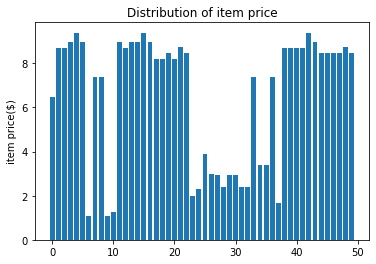

In [36]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

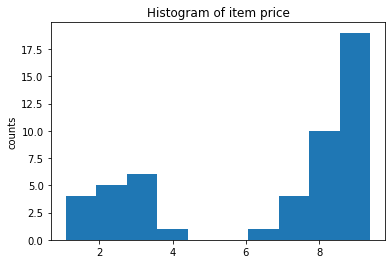

In [37]:
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

__[가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기]__

In [38]:
chipo.groupby('order_id').sum().sort_values(by = 'item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


__[Veggie Salad Bowl이 몇 번 주문되었는지 구하기]__

In [41]:
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


__[Chicken Bowl을 2개 이상 주문한 주문 횟수 구하기]__

In [48]:
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity'] # order_id를 기준으로 전부 합친 뒤 quantity 칼럼만을 추출
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
2      2
34     2
70     2
93     2
124    3
Name: quantity, dtype: int64